# Logistic Regression with Python

<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

## Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

### Pre-processing

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
def curl(path, fname, fmodel):
    """
    curl(path, 'save as', 'wb')
    """
    import urllib.request, urllib.parse, urllib.error
    
    file = urllib.request.urlopen(path).read()
    with open(fname, fmodel) as fhand:
        fhand.write(file)

In [3]:
#path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv'
#curl(path, 'ChurnData.csv', 'wb')

In [4]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
df.shape

(200, 10)

In [7]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [8]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [9]:
y = np.asarray(df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

### Train/Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 9) (160,)
Test set: (40, 9) (40,)


### Modeling (Logistic Regression with Scikit-learn)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_hat = LR.predict(X_test)
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [23]:
y_hat_prob = LR.predict_proba(X_test)
y_hat_prob[0:5]

array([[0.59, 0.41],
       [0.57, 0.43],
       [0.53, 0.47],
       [0.67, 0.33],
       [0.53, 0.47],
       [0.6 , 0.4 ],
       [0.5 , 0.5 ],
       [0.57, 0.43],
       [0.4 , 0.6 ],
       [0.59, 0.41],
       [0.55, 0.45],
       [0.59, 0.41],
       [0.52, 0.48],
       [0.41, 0.59],
       [0.69, 0.31],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.46, 0.54],
       [0.47, 0.53],
       [0.57, 0.43],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.67, 0.33],
       [0.5 , 0.5 ],
       [0.48, 0.52],
       [0.73, 0.27],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.74, 0.26],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.41, 0.59],
       [0.74, 0.26],
       [0.64, 0.36],
       [0.6 , 0.4 ],
       [0.46, 0.54],
       [0.57, 0.43],
       [0.69, 0.31],
       [0.48, 0.52]])

### Evaluation

#### 1. jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [24]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_hat)

0.65

#### 2. confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[ 8  7]
 [ 7 18]]


Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


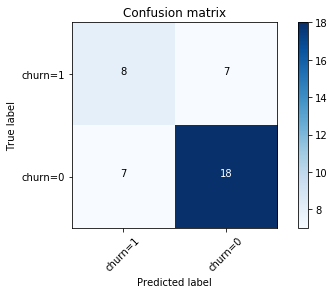

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],
                      normalize= False,  title='Confusion matrix')

In [27]:
print (classification_report(y_test, y_hat))

             precision    recall  f1-score   support

          0       0.72      0.72      0.72        25
          1       0.53      0.53      0.53        15

avg / total       0.65      0.65      0.65        40



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

#### 3. log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

In [28]:
from sklearn.metrics import log_loss
log_loss(y_test, y_hat_prob)

0.6155809757244557

In [29]:
# use different __solver__ and __regularization__ values
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.62
